In [1]:
##Linear regression is not appropriate for binary output (0 and 1)
##For these sort of problems, we use logistic regression
##When predicting classification problems, we train the model using X_train and deploy on X_test and evaluate using a confusion matrix
##Confusion matrix is used to measure the performance of a classification model on a set of data for which the true values are known
##Confusion matrix compares the predicted value to the actual value using logic (True/False)
##             Actual
##.             P   N
##Predicton P |TP| FP|
##          N |FN| TN|
###True Negative = Predicted No, Actual No
###True Positive = Predicted Yes, Actual Yes
###False Positive = Predicted Yes, Actual No (Type I error)
###False Negative = predicted No, Actual Yes (Type II error)
##From the Confusion Matrix, you can evaluate the model to a Classification Report as follows:
###Accuracy = How often the model correctly predicts = TP+TN/Total
###Misclassification Rate = Error rate, the rate of wrong predictions = FN+FP/Total
###Specificity = Rate of Negatives = TN/(TN+FP)
###Precision = Rate of True Positives to total Posive Predictions = TP/(TP+FP)
##Recall = Rate of True Positives to total Posive Actuals = TP/(TP + FN)

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("/Users/victornneji/Documents/Data Science with Python/Course_Material/S_11_Logistic_Regression/train_titanic.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
##Data exploration
##Deal with missing data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
##Get % of missing values
train.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [8]:
pct_missing_data = round((train.isnull().sum()/train.isnull().count())*100,3)

In [9]:
pct_missing_data

PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age            19.865
SibSp           0.000
Parch           0.000
Ticket          0.000
Fare            0.000
Cabin          77.104
Embarked        0.224
dtype: float64

<Axes: >

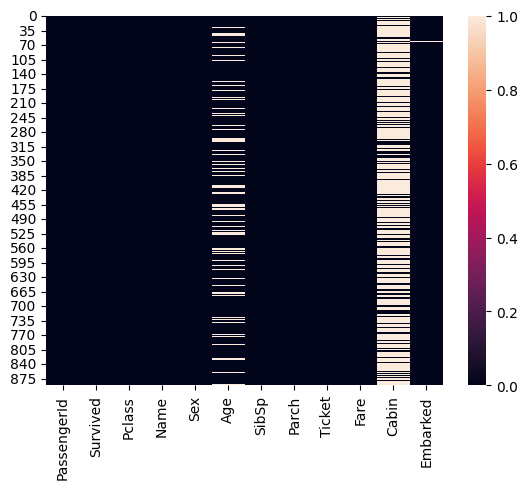

In [10]:
#visualise mising data using heatmap
sns.heatmap(data = train.isnull())

<Axes: >

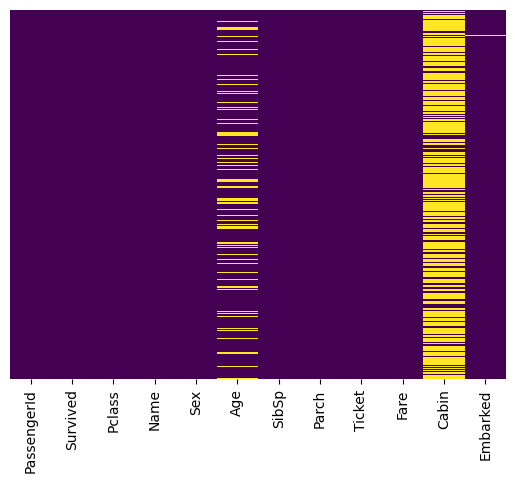

In [11]:
sns.heatmap(data = train.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)

<Axes: xlabel='Survived', ylabel='count'>

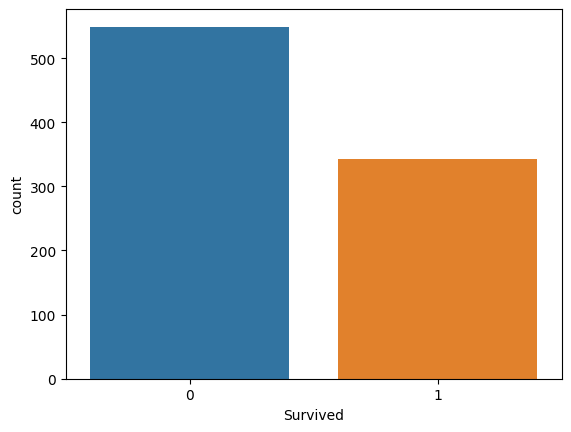

In [12]:
##See how many survived
sns.countplot(x = 'Survived', data = train)

<Axes: xlabel='Survived', ylabel='count'>

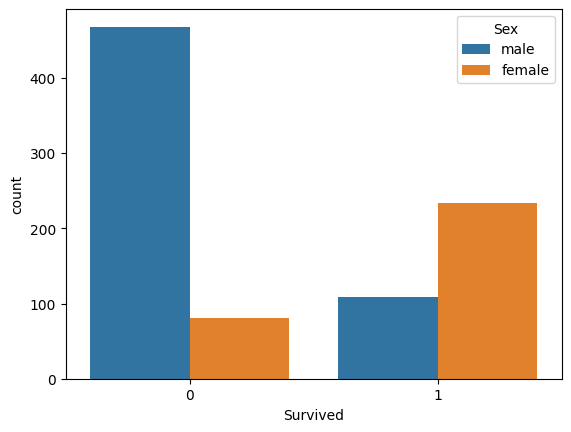

In [13]:
sns.countplot(x = 'Survived', data = train, hue = 'Sex')

In [14]:
train['Pclass'].unique()

array([3, 1, 2])

<Axes: xlabel='Survived', ylabel='count'>

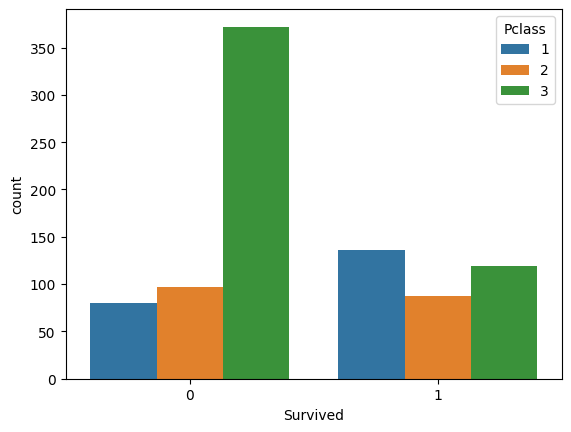

In [15]:
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

<Axes: xlabel='Embarked', ylabel='count'>

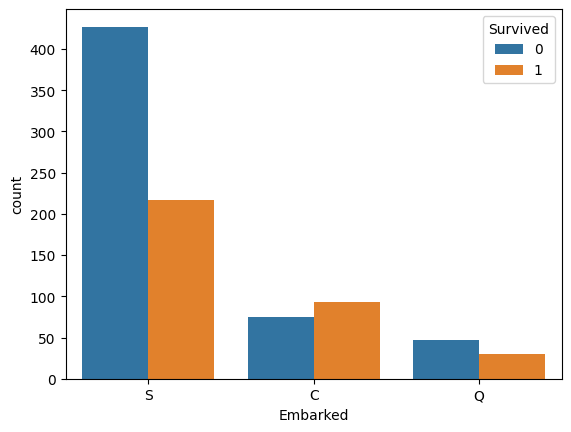

In [16]:
sns.countplot(x = 'Embarked', data = train, hue = 'Survived')

<Axes: xlabel='Embarked', ylabel='count'>

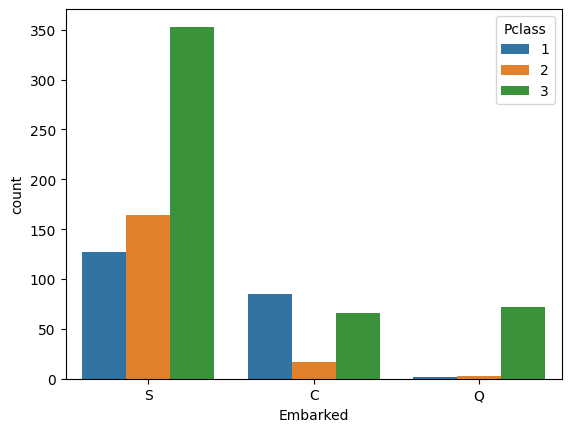

In [17]:
sns.countplot(x = 'Embarked', data = train, hue = 'Pclass')

<Axes: xlabel='Parch', ylabel='count'>

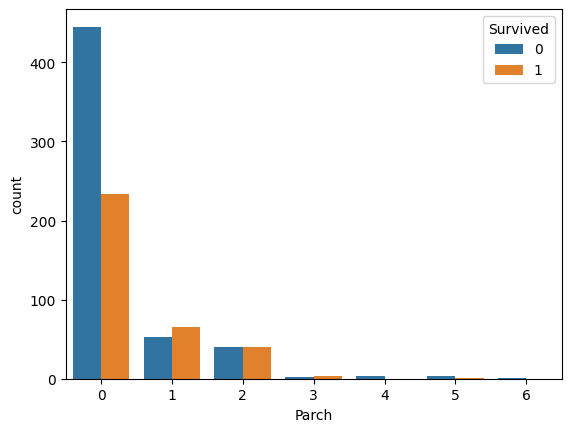

In [18]:
sns.countplot(x='Parch', data = train, hue = 'Survived')

In [19]:
pct_missing_data

PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age            19.865
SibSp           0.000
Parch           0.000
Ticket          0.000
Fare            0.000
Cabin          77.104
Embarked        0.224
dtype: float64

<Axes: xlabel='Pclass', ylabel='Age'>

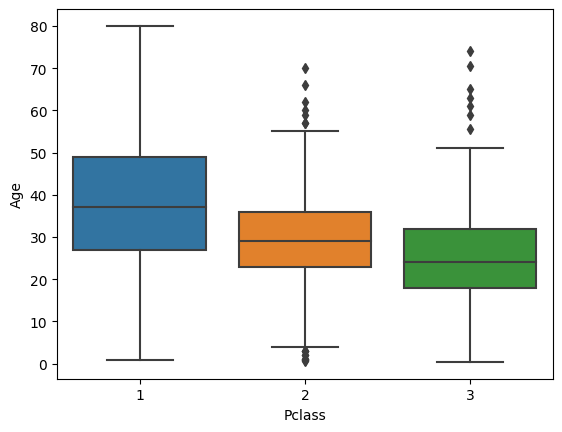

In [20]:
##Fill missing Age data with the average age by class
sns.boxplot(data = train, y = 'Age', x = 'Pclass')

In [21]:
##Get average age of each class
train[['Pclass', 'Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [22]:
##Create a function to fix the null ages with the average for each class
def impute_age(age_pclass):
    age = age_pclass[0]
    pclass = age_pclass[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass== 2:
            return 30
        else:
            return 25
    else:
        return age

In [23]:
##Apply the function
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

<Axes: >

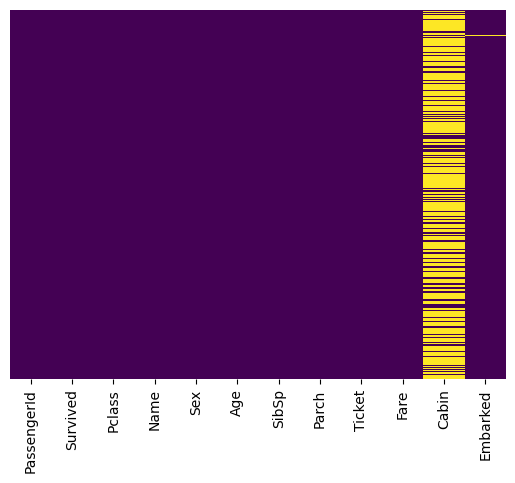

In [24]:
#Check the data again
sns.heatmap(data = train.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)

In [25]:
##Cabin column has too many nulls, so we drop the column
train.drop('Cabin', axis = 1, inplace = True)

<Axes: >

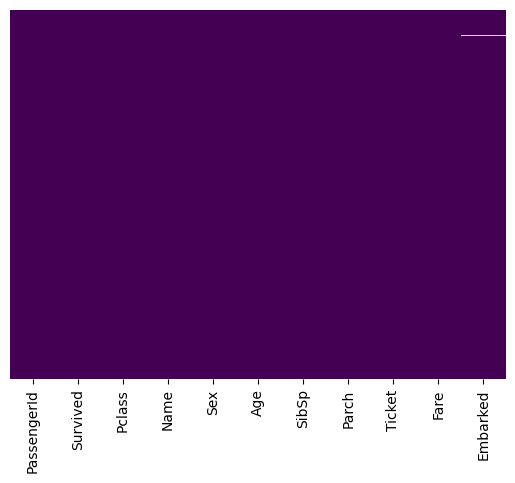

In [26]:
#Check the data again
sns.heatmap(data = train.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)

In [27]:
##Embarked has only 0.2% missing, so we can drop the NA rows
train.dropna(inplace = True)

<Axes: >

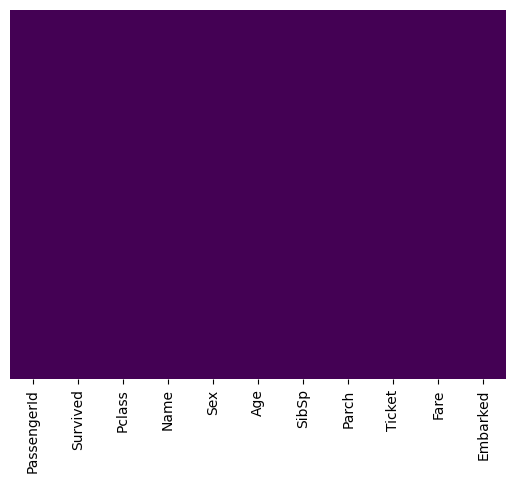

In [28]:
#Check the data again
sns.heatmap(data = train.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)

In [29]:
##Deal with the categorical features
##Convert features to logic by creating dummies, so as to eliminate string variables
##Use the pandas function get_dummies to eliminate string variables
##To avoid multicolinearity (One column directly determining another in your variables) pass drop_first = True
##If get_dummies returns True/False, convert to 1/0 using pd.replace
sex = pd.get_dummies(train['Sex'],drop_first=True).replace(to_replace=[True,False], value = [1,0])
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [30]:
##Do same for Embarked. Recall that there are 3 ports of embarkment:Q,S,C. Dropping first will affirm that if not Q,S, then C
embark = pd.get_dummies(train['Embarked'],drop_first=True).replace(to_replace=[True,False], value = [1,0])
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [31]:
train = pd.concat([train, sex, embark], axis = 1)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [33]:
##Drop redundant columns Sex, Embarked. Also drop Ticket, Name, since we don't need them in our modelling
train.drop(['Sex', 'Embarked','Ticket', 'Name'], axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [34]:
##Now our data is purely numeric
##Also drop PassengerId, as it is only an index and does not serve as a determinant variable 
train.drop(['PassengerId'], axis = 1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [35]:
##Now We have cleaned the data and it is ready for log. regression
##Create X and y datasets
X = train.drop('Survived', axis = 1);
y = train['Survived']
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [36]:
##Split X into train and test datasets
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
#Import log. regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter = 10000)

In [39]:
##Fit the dataset
logr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


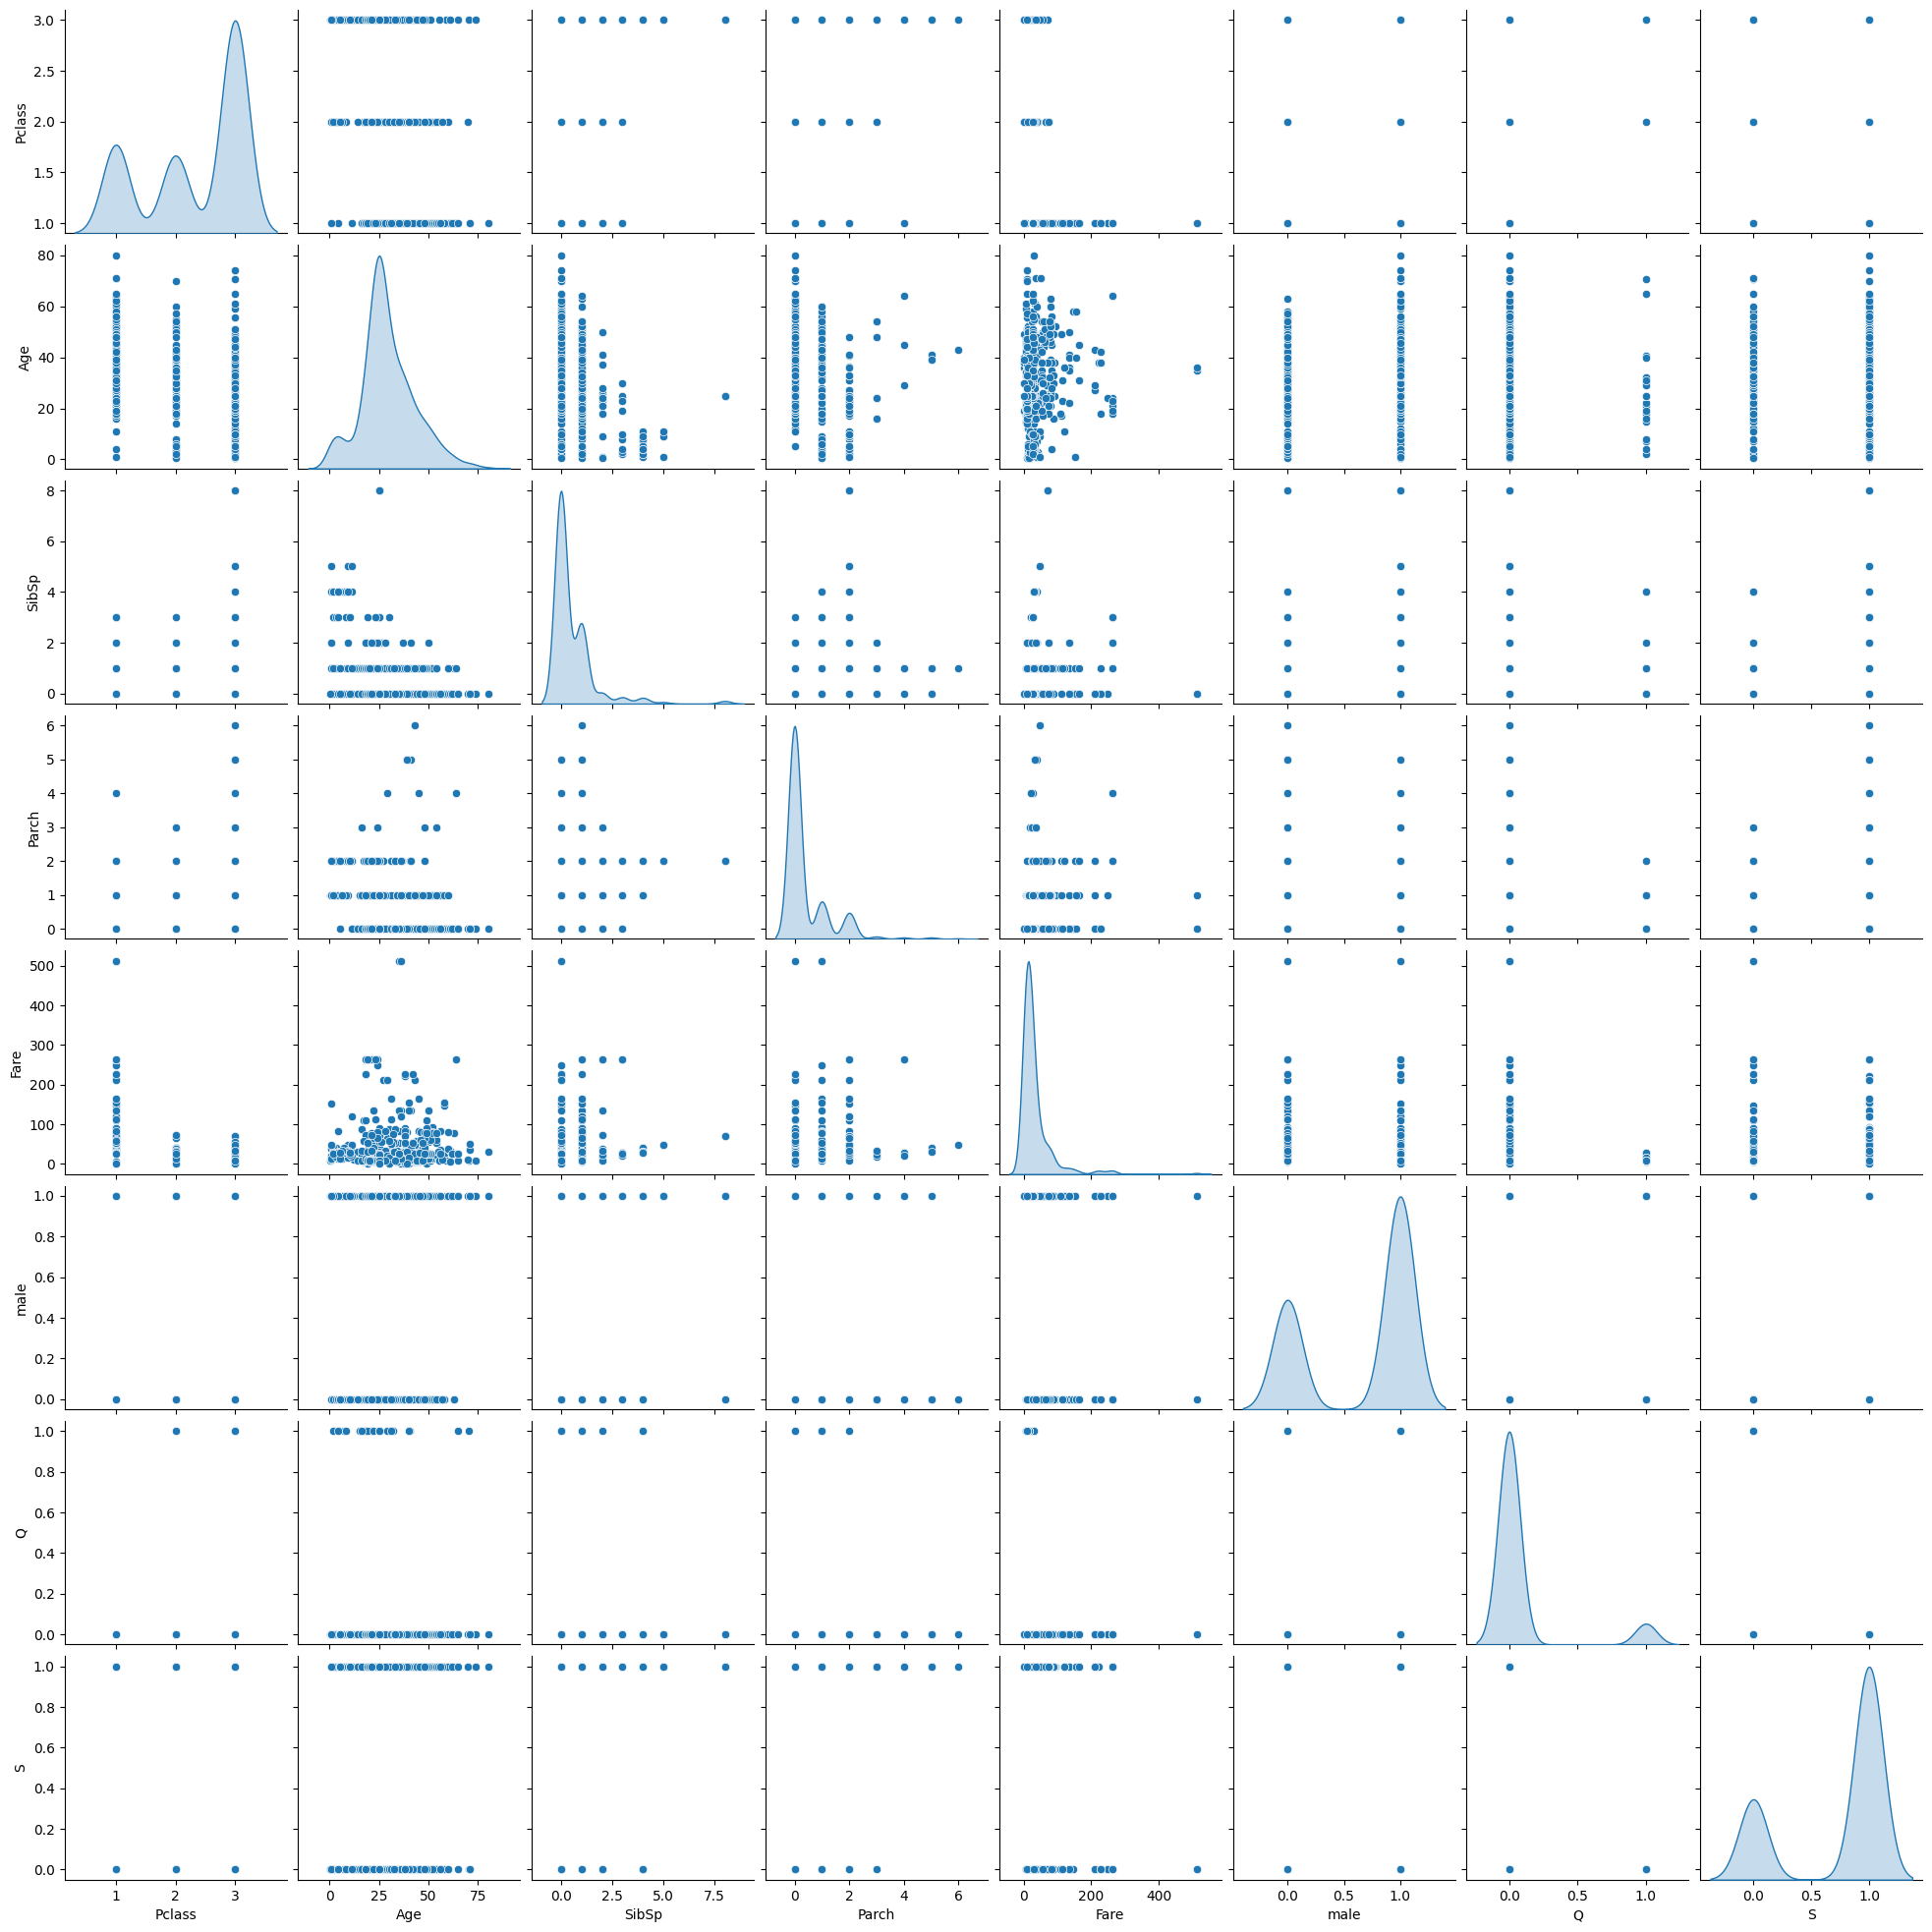

In [40]:
sns.pairplot(data = X_train, diag_kind = 'kde')

In [41]:
##Get predictions
pred = logr.predict(X_test)

In [42]:
#Evaluate model using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       184
           1       0.75      0.76      0.76       110

    accuracy                           0.82       294
   macro avg       0.80      0.81      0.80       294
weighted avg       0.82      0.82      0.82       294



In [43]:
#Evaluate model using confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[156  28]
 [ 26  84]]


In [44]:

##Set dummies for Pclass, since it is also categorical
passclass = pd.get_dummies(train['Pclass'],drop_first=True, prefix = "pclass_").replace(to_replace=[True,False], value = [1,0],)
passclass.head()

,pclass__2,pclass__3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [45]:
train = pd.concat([train, passclass], axis = 1)

In [46]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,pclass__2,pclass__3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [47]:
train.drop(['Pclass'], axis = 1, inplace = True)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,pclass__2,pclass__3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [48]:
X = train.drop('Survived', axis = 1);
y = train['Survived']
X.head()

,Age,SibSp,Parch,Fare,male,Q,S,pclass__2,pclass__3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
#Import log. regression
from sklearn.linear_model import LogisticRegression
logr_p = LogisticRegression(max_iter = 10000)

In [51]:
logr_p.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [52]:
##Get predictions
pred_p = logr_p.predict(X_test)

In [53]:
#Evaluate model using confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_p))

[[163  21]
 [ 29  81]]
